In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
#Load data
df = pd.read_csv('/content/preprocessed_sales_data.csv')

In [20]:
X = df.drop(columns=["UnitPrice"])
y = df["UnitPrice"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),

}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, r2))
    print(f"{name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}\n")

Linear Regression
RMSE: 1.3587
R² Score: -0.8363

Ridge Regression
RMSE: 1.3584
R² Score: -0.8354

Lasso Regression
RMSE: 1.0543
R² Score: -0.1057

Decision Tree
RMSE: 0.9364
R² Score: 0.1278

Random Forest
RMSE: 0.9279
R² Score: 0.1435



In [23]:
best_model = min(results, key=lambda x: x[1])
print(f"Best Model: {best_model[0]} with RMSE = {best_model[1]:.4f}, R² = {best_model[2]:.4f}")

Best Model: Random Forest with RMSE = 0.9279, R² = 0.1435


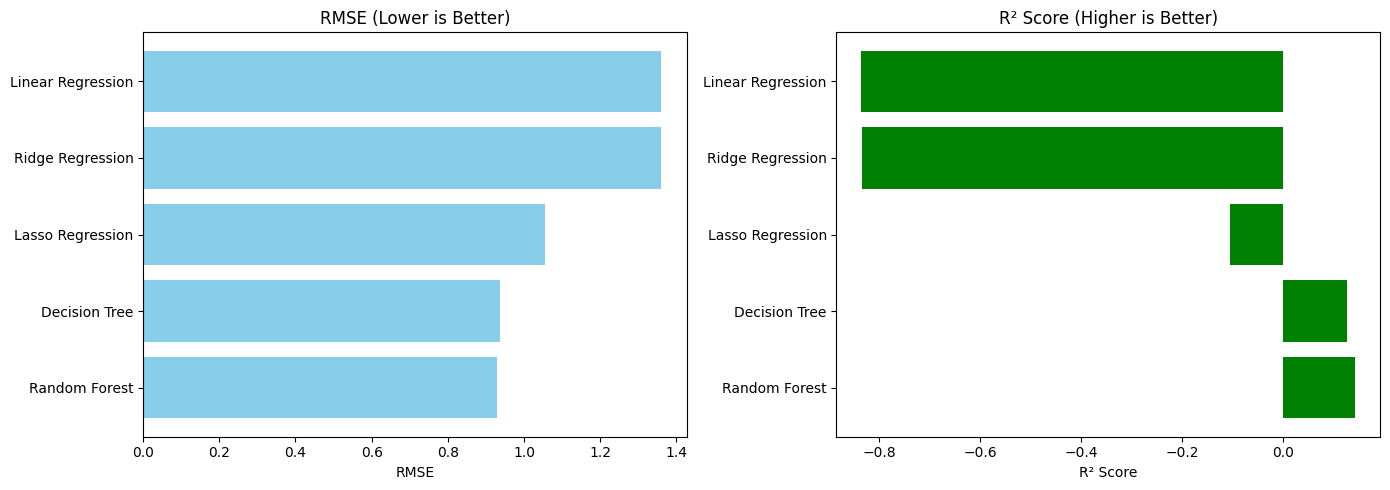

In [25]:
model_names = [name for name, rmse, r2 in results]
rmse_scores = [rmse for name, rmse, r2 in results]
r2_scores = [r2 for name, rmse, r2 in results]


plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
plt.barh(model_names, rmse_scores, color='skyblue')
plt.title("RMSE (Lower is Better)")
plt.xlabel("RMSE")
plt.gca().invert_yaxis()


plt.subplot(1, 2, 2)
plt.barh(model_names, r2_scores, color='green')
plt.title("R² Score (Higher is Better)")
plt.xlabel("R² Score")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()